# Яндекс.Музыка

Сравнение Москвы и Петербурга окружено мифами. Например:
 * Москва — мегаполис, подчинённый жёсткому ритму рабочей недели;
 * Петербург — культурная столица, со своими вкусами.

На данных Яндекс.Музыки вы сравните поведение пользователей двух столиц.

**Цель исследования** — проверьте три гипотезы:
1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города. 
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.

**Ход исследования**

Данные о поведении пользователей вы получите из файла `yandex_music_project.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Вы проверите данные на ошибки и оцените их влияние на исследование. Затем, на этапе предобработки вы поищете возможность исправить самые критичные ошибки данных.
 
Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотез.



Обзор данных

Составьте первое представление о данных Яндекс.Музыки.




Основной инструмент аналитика — `pandas`. Импортируйте эту библиотеку.

In [1]:
import pandas as pd # импорт библиотеки pandas

Прочитайте файл `yandex_music_project.csv` из папки `/datasets` и сохраните его в переменной `df`:

In [2]:
df = pd.read_csv('/datasets/yandex_music_project.csv') # чтение файла с данными и сохранение в df

Выведите на экран первые десять строк таблицы:

In [3]:
df.head(10) # получение первых 10 строк таблицы df

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,NaN,ruspop,Moscow,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Saint-Petersburg,21:20:49,Wednesday


Одной командой получить общую информацию о таблице:

In [4]:
df.info() # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
  userID    65079 non-null object
Track       63848 non-null object
artist      57876 non-null object
genre       63881 non-null object
  City      65079 non-null object
time        65079 non-null object
Day         65079 non-null object
dtypes: object(7)
memory usage: 3.5+ MB


Итак, в таблице семь столбцов. Тип данных во всех столбцах — `object`.

Согласно документации к данным:
* `userID` — идентификатор пользователя;
* `Track` — название трека;  
* `artist` — имя исполнителя;
* `genre` — название жанра;
* `City` — город пользователя;
* `time` — время начала прослушивания;
* `Day` — день недели.

В названиях колонок видны три нарушения стиля:
1. Строчные буквы сочетаются с прописными.
2. Встречаются пробелы.
3. Название некторых колонок начинается с прописной буквы # Найдите ещё одну проблему в названии колонок и опишите её в этом пункте.



Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.


**Выводы**

В каждой строке таблицы — данные о прослушанном треке. Часть колонок описывает саму композицию: название, исполнителя и жанр. Остальные данные рассказывают о пользователе: из какого он города, когда он слушал музыку. 

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных
Исправьте стиль в заголовках столбцов, исключите пропуски. Затем проверьте данные на дубликаты.

### Стиль заголовков
Выведите на экран названия столбцов:

In [5]:
df.columns # перечень названий столбцов таблицы df

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')

Приведите названия в соответствие с хорошим стилем:
* несколько слов в названии запишите в «змеином_регистре»,
* все символы сделайте строчными,
* устраните пробелы.

Для этого переименуйте колонки так:
* `'  userID'` → `'user_id'`;
* `'Track'` → `'track'`;
* `'  City  '` → `'city'`;
* `'Day'` → `'day'`.

In [6]:
df = df.rename(columns={'  userID':'user_id', 'Track':'track', '  City  ':'city', 'Day':'day'}) # переименование столбцов

Проверьте результат. Для этого ещё раз выведите на экран названия столбцов:

In [7]:
print(df.columns) # проверка результатов - перечень названий столбцов

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')


### Пропуски значений
Сначала посчитайте, сколько в таблице пропущенных значений. Для этого достаточно двух методов `pandas`:

In [8]:
print(df.isna().sum())   # подсчёт пропусков 

user_id       0
track      1231
artist     7203
genre      1198
city          0
time          0
day           0
dtype: int64


Не все пропущенные значения влияют на исследование. Так в `track` и `artist` пропуски не важны для вашей работы. Достаточно заменить их явными обозначениями.

Но пропуски в `genre` могут помешать сравнению музыкальных вкусов в Москве и Санкт-Петербурге. На практике было бы правильно установить причину пропусков и восстановить данные. Такой возможности нет в учебном проекте. Придётся:
* заполнить и эти пропуски явными обозначениями,
* оценить, насколько они повредят расчётам. 

Замените пропущенные значения в столбцах `track`, `artist` и `genre` на строку `'unknown'`. Для этого создайте список `columns_to_replace`, переберите его элементы циклом `for` и для каждого столбца выполните замену пропущенных значений:

In [9]:
columns_to_replace = ['track', 'artist', 'genre'] # перебор названий столбцов в цикле и замена пропущенных значений на 'unknown'
for column in columns_to_replace:
    df[column] = df[column].fillna('unknown')

Убедитесь, что в таблице не осталось пропусков. Для этого ещё раз посчитайте пропущенные значения.

In [10]:
print(df.isna().sum()) # подсчёт пропусков

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64


### Дубликаты
Посчитайте явные дубликаты в таблице одной командой:

In [11]:
df.duplicated().sum() # подсчёт явных дубликатов

3826

Вызовите специальный метод `pandas`, чтобы удалить явные дубликаты:

In [12]:
df = df.drop_duplicates().reset_index(drop=True) # удаление явных дубликатов (с удалением старых индексов и формированием новых)

Ещё раз посчитайте явные дубликаты в таблице — убедитесь, что полностью от них избавились:

In [13]:
df.duplicated().sum() # проверка на отсутствие дубликатов

0

Теперь избавьтесь от неявных дубликатов в колонке `genre`. Например, название одного и того же жанра может быть записано немного по-разному. Такие ошибки тоже повлияют на результат исследования.

Выведите на экран список уникальных названий жанров, отсортированный в алфавитном порядке. Для этого:
* извлеките нужный столбец датафрейма, 
* примените к нему метод сортировки,
* для отсортированного столбца вызовите метод, который вернёт уникальные значения из столбца.

In [14]:
#Просмотр уникальных названий жанров
# Сразу отсортировать
df['genre'].sort_values().unique()

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

Просмотрите список и найдите неявные дубликаты названия `hiphop`. Это могут быть названия с ошибками или альтернативные названия того же жанра.

Вы увидите следующие неявные дубликаты:
* *hip*,
* *hop*,
* *hip-hop*.

Чтобы очистить от них таблицу, напишите функцию `replace_wrong_genres()` с двумя параметрами: 
* `wrong_genres` — список дубликатов,
* `correct_genre` — строка с правильным значением.

Функция должна исправить колонку `genre` в таблице `df`: заменить каждое значение из списка `wrong_genres` на значение из `correct_genre`.

In [15]:
genres_list = df['genre'].unique()
def replace_wrong_genres(wrong_genres, correct_genre): # Функция для замены неявных дубликатов
    for wrong_genr in wrong_genres: # перебираем неправильные жанр
        df['genre'] = df['genre'].replace(wrong_genres, correct_genre) # и для каждого неправильного жанрa вызываем метод replace()

In [16]:
 # список неправильных жанр
 # список правильных жанр

replace_wrong_genres(['hip', 'hop', 'hip-hop'], 'hiphop')

Вызовите `replace_wrong_genres()` и передайте ей такие аргументы, чтобы она устранила неявные дубликаты: вместо `hip`, `hop` и `hip-hop` в таблице должно быть значение `hiphop`:

In [17]:
print(genres_list) # Устранение неявных дубликатов

['rock' 'pop' 'folk' 'dance' 'rusrap' 'ruspop' 'world' 'electronic'
 'unknown' 'alternative' 'children' 'rnb' 'hip' 'jazz' 'postrock' 'latin'
 'classical' 'metal' 'reggae' 'tatar' 'blues' 'instrumental' 'rusrock'
 'dnb' 'türk' 'post' 'country' 'psychedelic' 'conjazz' 'indie'
 'posthardcore' 'local' 'avantgarde' 'punk' 'videogame' 'techno' 'house'
 'christmas' 'melodic' 'caucasian' 'reggaeton' 'soundtrack' 'singer' 'ska'
 'shanson' 'ambient' 'film' 'western' 'rap' 'beats' "hard'n'heavy"
 'progmetal' 'minimal' 'contemporary' 'new' 'soul' 'holiday' 'german'
 'tropical' 'fairytail' 'spiritual' 'urban' 'gospel' 'nujazz' 'folkmetal'
 'trance' 'miscellaneous' 'anime' 'hardcore' 'progressive' 'chanson'
 'numetal' 'vocal' 'estrada' 'russian' 'classicmetal' 'dubstep' 'club'
 'deep' 'southern' 'black' 'folkrock' 'fitness' 'french' 'disco'
 'religious' 'hiphop' 'drum' 'extrememetal' 'türkçe' 'experimental' 'easy'
 'metalcore' 'modern' 'argentinetango' 'old' 'breaks' 'eurofolk'
 'stonerrock' 'indus

Проверьте, что заменили неправильные названия:

*   hip
*   hop
*   hip-hop

Выведите отсортированный список уникальных значений столбца `genre`:

In [18]:
#df['genre'].unique # Проверка на неявные дубликаты
#df['genre'].count().sort_values(ascending=False)
#spb_genres=spb_general.groupby('genre_name')['genre_name'].count().sort_values(ascending=False)
df['genre'].sort_values().count()

61253

**Выводы**

Предобработка обнаружила три проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- дубликаты — явные и неявные.

Вы исправили заголовки, чтобы упростить работу с таблицей. Без дубликатов исследование станет более точным.

Пропущенные значения вы заменили на `'unknown'`. Ещё предстоит увидеть, не повредят ли исследованию пропуски в колонке `genre`.

Теперь можно перейти к проверке гипотез. 

## Проверка гипотез

### Сравнение поведения пользователей двух столиц

Первая гипотеза утверждает, что пользователи по-разному слушают музыку в Москве и Санкт-Петербурге. Проверьте это предположение по данным о трёх днях недели — понедельнике, среде и пятнице. Для этого:

* Разделите пользователей Москвы и Санкт-Петербурга
* Сравните, сколько треков послушала каждая группа пользователей в понедельник, среду и пятницу.


Для тренировки сначала выполните каждый из расчётов по отдельности. 

Оцените активность пользователей в каждом городе. Сгруппируйте данные по городу и посчитайте прослушивания в каждой группе.



In [19]:
df.groupby('city').count() #Разделим пользователей Москвы и Санкт-Петербурга

,user_id,track,artist,genre,time,day
city,,,,,,
Moscow,42741,42741,42741,42741,42741,42741
Saint-Petersburg,18512,18512,18512,18512,18512,18512


In [20]:
# Подсчёт прослушиваний в каждом городе
df.groupby('city')['user_id'].count()

city
Moscow              42741
Saint-Petersburg    18512
Name: user_id, dtype: int64

В Москве прослушиваний больше, чем в Петербурге. Из этого не следует, что московские пользователи чаще слушают музыку. Просто самих пользователей в Москве больше.

Теперь сгруппируйте данные по дню недели и подсчитайте прослушивания в понедельник, среду и пятницу. Учтите, что в данных есть информация только о прослушиваниях только за эти дни.


In [21]:
# Подсчёт прослушиваний в каждый из трёх дней
df.groupby('day')['user_id'].count()

day
Friday       21840
Monday       21354
Wednesday    18059
Name: user_id, dtype: int64

В среднем пользователи из двух городов менее активны по средам. Но картина может измениться, если рассмотреть каждый город в отдельности.
Вы видели, как работает группировка по городу и по дням недели. Теперь напишите функцию, которая объединит два эти расчёта.

Создайте функцию `number_tracks()`, которая посчитает прослушивания для заданного дня и города. Ей понадобятся два параметра:
* день недели,
* название города.

В функции сохраните в переменную строки исходной таблицы, у которых значение:
  * в колонке `day` равно параметру `day`,
  * в колонке `city` равно параметру `city`.

Для этого примените последовательную фильтрацию с логической индексацией.

Затем посчитайте значения в столбце `user_id` получившейся таблицы. Результат сохраните в новую переменную. Верните эту переменную из функции.

In [22]:
# <создание функции number_tracks()>
# Объявляется функция с двумя параметрами: day, city.
# В переменной track_list сохраняются те строки таблицы df, для которых 
# значение в столбце 'day' равно параметру day и одновременно значение
# в столбце 'city' равно параметру city (используйте последовательную фильтрацию
# с помощью логической индексации).
# В переменной track_list_count сохраняется число значений столбца 'user_id',
# рассчитанное методом count() для таблицы track_list.
# Функция возвращает число - значение track_list_count.

# Функция для подсчёта прослушиваний для конкретного города и дня.
# С помощью последовательной фильтрации с логической индексацией она 
# сначала получит из исходной таблицы строки с нужным днём,
# затем из результата отфильтрует строки с нужным городом,
# методом count() посчитает количество значений в колонке user_id. 
# Это количество функция вернёт в качестве результата

In [23]:
def number_tracks(day, city):
    track_list=df[(df['day']==day) & (df['city']==city)]
    track_list_count = track_list['user_id'].count()
    return track_list_count

Вызовите `number_tracks()` шесть раз, меняя значение параметров — так, чтобы получить данные для каждого города в каждый из трёх дней.

In [24]:
number_tracks('Monday', 'Moscow')  # количество прослушиваний в Москве по понедельникам

15740

In [25]:
number_tracks('Monday', 'Saint-Petersburg') # количество прослушиваний в Санкт-Петербурге по понедельникам

5614

In [26]:
number_tracks('Wednesday', 'Moscow') # количество прослушиваний в Москве по средам

11056

In [27]:
number_tracks('Wednesday', 'Saint-Petersburg') # количество прослушиваний в Санкт-Петербурге по средам

7003

In [28]:
number_tracks('Friday', 'Moscow') # количество прослушиваний в Москве по пятницам

15945

In [29]:
number_tracks('Friday', 'Saint-Petersburg') # количество прослушиваний в Санкт-Петербурге по пятницам

5895

Создайте c помощью конструктора `pd.DataFrame` таблицу, где
* названия колонок — `['city', 'monday', 'wednesday', 'friday']`;
* данные — результаты, которые вы получили с помощью `number_tracks`.

In [30]:
#data = ['number_tracks('Monday', 'Moscow')','number_tracks('Monday', 'Saint-Petersburg')']
data = [['Moscow', number_tracks('Monday', 'Moscow'), number_tracks('Wednesday', 'Moscow'), number_tracks('Friday', 'Moscow')],
        ['Saint-Petersburg', number_tracks('Monday', 'Saint-Petersburg'), number_tracks('Wednesday', 'Saint-Petersburg'), number_tracks('Friday', 'Saint-Petersburg')]]
columns = ['city', 'monday', 'wednesday', 'friday']
pd.DataFrame(data = data, columns = columns) #city, monday, wednesday, friday) # Таблица с результатами

,city,monday,wednesday,friday
0,Moscow,15740,11056,15945
1,Saint-Petersburg,5614,7003,5895


**Выводы**

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

Значит, данные говорят в пользу первой гипотезы.

### Музыка в начале и в конце недели

Согласно второй гипотезе, утром в понедельник в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.

Сохраните таблицы с данными в две переменные:
* по Москве — в `moscow_general`;
* по Санкт-Петербургу — в `spb_general`.

In [31]:
# получение таблицы moscow_general из тех строк таблицы df, 
# для которых значение в столбце 'city' равно 'Moscow'

moscow_general = df[df['city'] == 'Moscow']
moscow_general.head()

,user_id,track,artist,genre,city,time,day
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,unknown,ruspop,Moscow,09:17:40,Friday


In [32]:
# получение таблицы spb_general из тех строк таблицы df,
# для которых значение в столбце 'city' равно 'Saint-Petersburg'

spb_general = df[df['city'] == 'Saint-Petersburg']
spb_general.head()

,user_id,track,artist,genre,city,time,day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
9,E772D5C0,Pessimist,unknown,dance,Saint-Petersburg,21:20:49,Wednesday


Создайте функцию `genre_weekday()` с четырьмя параметрами:
* таблица (датафрейм) с данными,
* день недели,
* начальная временная метка в формате 'hh:mm', 
* последняя временная метка в формате 'hh:mm'.

Функция должна вернуть информацию о топ-10 жанров тех треков, которые прослушивали в указанный день, в промежутке между двумя отметками времени.

In [33]:
# Объявление функции genre_weekday() с параметрами table, day, time1, time2,
# которая возвращает информацию о самых популярных жанрах в указанный день в
# заданное время:
# 1) в переменную genre_df сохраняются те строки переданного датафрейма table, для
#    которых одновременно:
#    - значение в столбце day равно значению аргумента day
#    - значение в столбце time больше значения аргумента time1
#    - значение в столбце time меньше значения аргумента time2
#    Используйте последовательную фильтрацию с помощью логической индексации.
# 2) сгруппировать датафрейм genre_df по столбцу genre, взять один из его
#    столбцов и посчитать методом count() количество записей для каждого из
#    присутствующих жанров, получившийся Series записать в переменную
#    genre_df_count
# 3) отсортировать genre_df_count по убыванию встречаемости и сохранить
#    в переменную genre_df_sorted
# 4) вернуть Series из 10 первых значений genre_df_sorted, это будут топ-10
#    популярных жанров (в указанный день, в заданное время)

#def genre_weekday(table, day, time1, time2):
#    genre_df = table[table['day'] == day] 
#    genre_df = genre_df[genre_df['time'] > time1] 
#    genre_df = genre_df[genre_df['time'] < time2] 
#    genre_df_count = genre_df.groupby('genre')['genre'].count()
#    genre_df_sorted = genre_df_count.sort_values(ascending=False)
#    return genre_df_sorted.head(10)
def genre_weekday(table, day, time1, time2):
    genre_df = table[(table['day'] == day) & (table['time'] > time1) & (table['time'] < time2)]
    genre_df_count = genre_df.groupby('genre')['genre'].count()
    genre_df_sorted = genre_df_count.sort_values(ascending=False)
    return genre_df_sorted.head(10)

In [34]:
genre_df = table[(table['day'] == day) & (table['time'] > time1) & (table['time'] < time2)]

NameError: name 'table' is not defined

In [ ]:
genre_df = table.query('@day==day and @time1 < time < @time2')

Cравните результаты функции `genre_weekday()` для Москвы и Санкт-Петербурга в понедельник утром (с 7:00 до 11:00) и в пятницу вечером (с 17:00 до 23:00):

In [ ]:
# вызов функции для утра понедельника в Москве (вместо df — таблица moscow_general)
# объекты, хранящие время, являются строками и сравниваются как строки
# пример вызова: genre_weekday(moscow_general, 'Monday', '07:00', '11:00')

genre_weekday(moscow_general, 'Monday', '07:00', '11:00')

In [ ]:
 # вызов функции для утра понедельника в Петербурге (вместо df — таблица spb_general)
genre_weekday(spb_general, 'Monday', '07:00', '11:00')

In [ ]:
# вызов функции для вечера пятницы в Москве
genre_weekday(moscow_general, 'Friday', '17:00', '23:00')

In [ ]:
# вызов функции для вечера пятницы в Петербурге
genre_weekday(spb_general, 'Friday', '17:00', '23:00')

**Выводы**

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное отличие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение `'unknown'` заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования.

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах.

### Жанровые предпочтения в Москве и Петербурге

Гипотеза: Петербург — столица рэпа, музыку этого жанра там слушают чаще, чем в Москве.  А Москва — город контрастов, в котором, тем не менее, преобладает поп-музыка.

Сгруппируйте таблицу `moscow_general` по жанру и посчитайте прослушивания треков каждого жанра методом `count()`. Затем отсортируйте результат в порядке убывания и сохраните его в таблице `moscow_genres`.

In [ ]:
# одной строкой: группировка таблицы moscow_general по столбцу 'genre', 
# подсчёт числа значений 'genre' в этой группировке методом count(), 
# сортировка получившегося Series в порядке убывания и сохранение в moscow_genres

moscow_genres = moscow_general.groupby('genre')['genre'].count().sort_values(ascending = False)

Выведите на экран первые десять строк `moscow_genres`:

In [ ]:
# просмотр первых 10 строк moscow_genres
moscow_genres.head(10)

Теперь повторите то же и для Петербурга.

Сгруппируйте таблицу `spb_general` по жанру. Посчитайте прослушивания треков каждого жанра. Результат отсортируйте в порядке убывания и сохраните в таблице `spb_genres`:


In [ ]:
# одной строкой: группировка таблицы spb_general по столбцу 'genre', 
# подсчёт числа значений 'genre' в этой группировке методом count(), 
# сортировка получившегося Series в порядке убывания и сохранение в spb_genres

spb_genres = spb_general.groupby('genre')['genre'].count().sort_values(ascending = False)

Выведите на экран первые десять строк `spb_genres`:

In [ ]:
spb_genres.head(10) # просмотр первых 10 строк spb_genres

**Выводы**

Гипотеза частично подтвердилась:
* Поп-музыка — самый популярный жанр в Москве, как и предполагала гипотеза. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Вопреки ожиданиям, рэп одинаково популярен в Москве и Петербурге. 


## Итоги исследования

Мы проверили три гипотезы и установили:

1. День недели по-разному влияет на активность пользователей в Москве и Петербурге. 


Первая гипотеза полностью подтвердилась.
О чем говорит таблица 
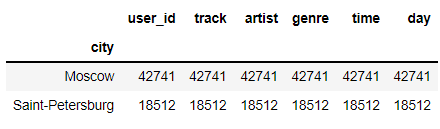
2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам:
* в Москве слушают музыку жанра “world”,
* в Петербурге — джаз и классику.

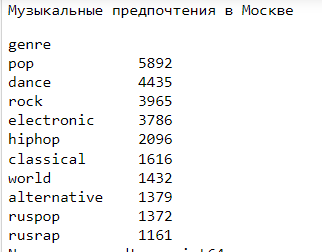

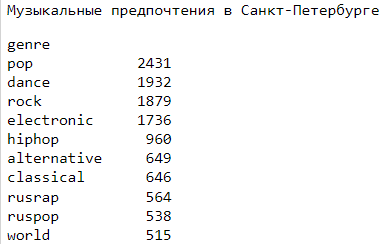

Таким образом, вторая гипотеза подтвердилась лишь отчасти. Этот результат мог оказаться иным, если бы не пропуски в данных.

3. Во вкусах пользователей Москвы и Петербурга больше общего чем различий. Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают московские.

Третья гипотеза не подтвердилась. Если различия в предпочтениях и существуют, на основной массе пользователей они незаметны.

**На практике исследования содержат проверки статистических гипотез.**
Из данных одного сервиса не всегда можно сделать вывод о всех жителях города.
Проверки статистических гипотез покажут, насколько они достоверны, исходя из имеющихся данных. 
С методами проверок гипотез вы ещё познакомитесь в следующих темах.